# Version 6 of my Kaggle Digit Recognizer Notebook.

Score: 0.97235

Runtime: 84.2s

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
# My imports

import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [3]:
# Reading in the training dataset & testing dataset

train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
# Displaying the training dataset for a first look.

display(train)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**The training dataset has 42,000 images with 784 pixels per image.
Labels for the images are in the first column 'label'**

In [5]:
display(test)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Separate the labels from the training dataset pixels
# Convert the labels into a numpy array

labels = train["label"].to_numpy()
display(labels)

array([1, 0, 1, ..., 7, 6, 9])

In [7]:
# Drop the labels from the training dataset to create a dataset of ONLY the pixels.
# Display dataset to make sure the column dropped

train.drop(columns='label', axis=1, inplace=True)
display(train)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Convert the pixels for each image into a numpy array
train_pixels = train.to_numpy()

# Print the pixels to make sure they're in an array
print(train_pixels)

# Print the shape of a pixel to know absolutely what size it is
print(train_pixels[9999].shape)

# Print the length of both the pixels and the labels to make sure they're the same.
print(len(train_pixels), len(labels))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(784,)
42000 42000


In [9]:
# Tried to reshape all arrays in train_pixesl from 784 to 28. 
# Didn't work though. Not sure why

#for i in range(len(train_pixels)):
#    train_pixels[i].reshape(28,28)

In [10]:
# Printed shape of train_pixels to see if the loop above worked. It didn't

# print(train_pixels[90].shape)

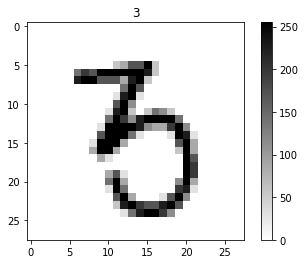

In [9]:
# Printing a single image with label in greyscale

np_arr = train_pixels[90].reshape(28,28)
plt.imshow(np_arr, interpolation='nearest', cmap=plt.cm.binary)
plt.title(labels[90])
plt.colorbar()
plt.show()

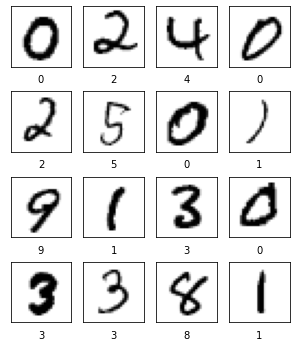

In [10]:
# Printing 16 random images and their labels. 
# Reshaped image in the plt.imshow row.
plt.figure(figsize=(5,6))

for i in range(16):
    k = random.randint(0, 42000)
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_pixels[k].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(labels[k])

In [12]:
# Ensuring that the pixels range from 0 to 255

ranged = np.unique(train_pixels)
print(ranged)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [13]:
# Normalizing the train pixels and the test pixels

train_pixels = train_pixels / 255
test = test / 255

In [14]:
# initiating neural network model

model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),     # Converting matrix forms (28x28) to vector forms (784)
            tf.keras.layers.Dense(128, activation=tf.nn.relu),   # A layer with 128 nodes and ReLU as the choice of the activation function
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)  # Output layer with 10 nodes (because there are 10 classifications)
])

2023-02-07 23:11:42.250465: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
# Initiate the model with the training dataset

model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

model.fit(train_pixels, labels, epochs=10)

2023-02-07 23:11:45.244883: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2953 - accuracy: 0.9156
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1291 - accuracy: 0.9622
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0879 - accuracy: 0.9739
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0666 - accuracy: 0.9807
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0491 - accuracy: 0.9854
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0406 - accuracy: 0.9880
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0300 - accuracy: 0.9911
Epoch 8/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0244 - accuracy: 0.9929
Epoch 9/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0189 - accuracy: 0.9945
Epoch 10/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.016

In [24]:
# Put the deep learning model on the test set

#x_test = model.evaluate(test)
#predictions = model.predict(test)

875/875 [==============================] - 1s 839us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [29]:
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
X_test = []
for row in range(len(test_data)):
    spl = test_data.iloc[row, ]['pixel0' : 'pixel783']
    np_mid = spl.to_numpy() / 255
    np_arr = np_mid.reshape(28,28)
    X_test.append(np_arr)
    
X_test = tf.convert_to_tensor(X_test)
predictions = model.predict(X_test)

In [30]:
pred = []
img_id = []
ix = 1
for i in range(len(test)):
    ans = np.argmax(predictions[i])
    pred.append(ans)
    img_id.append(ix)
    ix+=1

In [31]:
print(predictions)

[[8.7392875e-13 1.4893888e-21 1.0000000e+00 ... 2.3559052e-13
  1.9306727e-13 2.2733979e-19]
 [9.9999607e-01 1.9492985e-10 3.2874408e-07 ... 5.8857768e-08
  6.1487144e-13 1.1392346e-13]
 [4.7023657e-10 1.7245742e-07 2.3164559e-07 ... 5.0824703e-05
  2.3900191e-04 9.9882752e-01]
 ...
 [1.6005051e-12 3.9733389e-10 7.6972061e-11 ... 8.4389051e-11
  1.3530801e-07 3.3550865e-08]
 [2.2230754e-08 7.5658544e-13 2.2337714e-10 ... 1.5769449e-05
  1.2421302e-08 9.9977189e-01]
 [7.0298796e-13 9.8271737e-17 1.0000000e+00 ... 2.2299381e-14
  2.1583551e-11 1.3546668e-13]]


In [34]:
# Export Sumbission
output = pd.DataFrame({'ImageId': img_id, 'Label': pred})
output.to_csv('sumbission.csv', index=False)

In [35]:
output.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
